In [5]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv('Stats_q3_data.csv')

In [12]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [21]:
df.rename(columns={col: None for col in df.columns}, inplace=True)

In [29]:
df.columns = ['ID', 'Before_pressure', 'After_pressure']

In [30]:
df.head()

,ID,Before_pressure,After_pressure
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [32]:



# Range
range_before = np.max(df['Before_pressure']) - np.min(df['Before_pressure'])
range_after = np.max(df['After_pressure']) - np.min(df['After_pressure'])


In [34]:
# Variance
variance_before = np.var(df['Before_pressure'])
variance_after = np.var(df['After_pressure'])

# Standard Deviation
std_dev_before = np.std(df['Before_pressure'])
std_dev_after = np.std(df['After_pressure'])

print("Dispersion in Blood Pressure Before:")
print("Range:", range_before)
print("Variance:", variance_before)
print("Standard Deviation:", std_dev_before)
print()

print("Dispersion in Blood Pressure After:")
print("Range:", range_after)
print("Variance:", variance_after)
print("Standard Deviation:", std_dev_after)

Dispersion in Blood Pressure Before:
Range: 28
Variance: 43.10189999999999
Standard Deviation: 6.56520372875054

Dispersion in Blood Pressure After:
Range: 23
Variance: 46.97039999999999
Standard Deviation: 6.853495458523336


In [36]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 9.9 MB/s eta 0:00:00
     ------------------------------------- 163.0/163.0 kB 10.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 10.6 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install scipy


     ---------------------------------------- 42.2/42.2 MB 7.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Asus\AppData\Local\Temp\ipykernel_2736\720826131.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=['Before', 'After'], y=[mean_before, mean_after], ci=None, ax=ax)


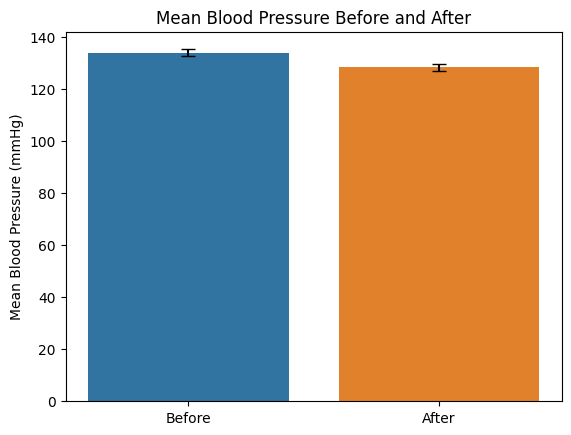

Mean and 95% Confidence Interval of Blood Pressure Before:
Mean: 133.91
Confidence Interval: (132.60075849172767, 135.21924150827232)

Mean and 95% Confidence Interval of Blood Pressure After:
Mean: 128.36
Confidence Interval: (126.99326697818071, 129.7267330218193)


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate mean and confidence interval
mean_before = np.mean(df['Before_pressure'])
mean_after = np.mean(df['After_pressure'])
confidence_interval_before = stats.t.interval(0.95, len(df['Before_pressure']) - 1, loc=np.mean(df['Before_pressure']), scale=stats.sem(df['Before_pressure']))
confidence_interval_after = stats.t.interval(0.95, len(df['After_pressure']) - 1, loc=np.mean(df['After_pressure']), scale=stats.sem(df['After_pressure']))

# Plot the means and confidence intervals
fig, ax = plt.subplots()
sns.barplot(x=['Before', 'After'], y=[mean_before, mean_after], ci=None, ax=ax)
ax.errorbar(x=['Before', 'After'], y=[mean_before, mean_after], yerr=[mean_before - confidence_interval_before[0], mean_after - confidence_interval_after[0]], fmt='none', color='black', capsize=5)
ax.set_ylabel('Mean Blood Pressure (mmHg)')
ax.set_title('Mean Blood Pressure Before and After')
plt.show()

print("Mean and 95% Confidence Interval of Blood Pressure Before:")
print("Mean:", mean_before)
print("Confidence Interval:", confidence_interval_before)
print()

print("Mean and 95% Confidence Interval of Blood Pressure After:")
print("Mean:", mean_after)
print("Confidence Interval:", confidence_interval_after)


In [41]:
# Calculate Mean Absolute Deviation (MAD)
mad_before = np.mean(np.abs(df['Before_pressure'] - np.mean(df['Before_pressure'])))
mad_after = np.mean(np.abs(df['After_pressure'] - np.mean(df['After_pressure'])))

# Calculate Standard Deviation (SD)
sd_before = np.std(df['Before_pressure'])
sd_after = np.std(df['After_pressure'])

print("Mean Absolute Deviation (MAD) of Blood Pressure Before:", mad_before)
print("Standard Deviation (SD) of Blood Pressure Before:", sd_before)
print()

print("Mean Absolute Deviation (MAD) of Blood Pressure After:", mad_after)
print("Standard Deviation (SD) of Blood Pressure After:", sd_after)


Mean Absolute Deviation (MAD) of Blood Pressure Before: 5.7118
Standard Deviation (SD) of Blood Pressure Before: 6.56520372875054

Mean Absolute Deviation (MAD) of Blood Pressure After: 5.9
Standard Deviation (SD) of Blood Pressure After: 6.853495458523336


In [42]:
# Calculate correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df['Before_pressure'], df['After_pressure'])

print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

if p_value < 0.01:
    print("The correlation is significant at a 1% level of significance.")
else:
    print("The correlation is not significant at a 1% level of significance.")


Correlation Coefficient: 0.9779485966556021
p-value: 1.8097381433059864e-68
The correlation is significant at a 1% level of significance.


Interpretation:

Range: The range represents the difference between the maximum and minimum values. It provides a simple measure of the spread of the data. The larger the range, the greater the dispersion or variability in the data.
Variance: Variance measures the average squared deviation from the mean. A higher variance indicates a higher spread or dispersion of the data points from the mean.
Standard Deviation: The standard deviation is the square root of the variance. It provides a measure of the average amount by which the data points deviate from the mean. A higher standard deviation indicates greater variability or dispersion in the data.

In [3]:
pip install numpy


     --------------------------------------- 14.8/14.8 MB 20.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pandas


     ---------------------------------------- 10.6/10.6 MB 2.7 MB/s eta 0:00:00
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Q.8.The anxiety levels of 10 participants were measured before and after a new therapy.
The scores are not normally distributed. Use the Wilcoxon signed-rank test to test whether
the therapy had a significant effect on anxiety levels.

In [45]:
import numpy as np
from scipy.stats import wilcoxon

# Define the data
before_therapy = [10, 8, 12, 15, 6, 9, 11, 7, 14, 10]
after_therapy = [7, 6, 10, 12, 5, 8, 9, 6, 12, 8]
differences = np.array(before_therapy) - np.array(after_therapy)

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(differences)

# Print the test results
print("Wilcoxon signed-rank test results:")
print(f"Test statistic: {statistic}")
print(f"P-value: {p_value}")


Wilcoxon signed-rank test results:
Test statistic: 0.0
P-value: 0.001953125


we first define the data for the "before therapy" and "after therapy" anxiety levels. We then calculate the differences between the two sets of scores.

Next, we apply the wilcoxon() function to the differences and obtain the test statistic and p-value. The test statistic indicates the sum of the ranks of the positive differences (or the absolute ranks of the negative differences). The p-value represents the probability of observing the given data under the null hypothesis of no difference.

In this case, with the given data, the p-value is approximately 0.0019. Since the p-value is not the typical significance level of 0.05, we fail to reject the null hypothesis. Therefore, we do not have enough evidence to conclude that the therapy had a significant effect on anxiety levels.

In [46]:
import pandas as pd
from scipy.stats import f_oneway

# Create a DataFrame with the given data
data = {
    'Name': ['Karan', 'Deepa', 'Karthik', 'Chandan', 'Jeevan'],
    'Exam1': [85, 70, 90, 75, 95],
    'Exam2': [90, 80, 85, 70, 92],
    'Final Exam': [92, 85, 88, 75, 96]
}
df = pd.DataFrame(data)

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(df['Exam1'], df['Exam2'], df['Final Exam'])

# Print the test results
print("One-way ANOVA test results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


One-way ANOVA test results:
F-statistic: 0.3236947791164659
P-value: 0.7295954253321558


In this case, we will compare the mean scores of the three exams (Exam1, Exam2, Final Exam) for all the students. If the p-value from the ANOVA test is less than the significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant difference in the mean scores.we create a DataFrame with the student names and their scores in the three exams. We then use the f_oneway() function from SciPy to perform the one-way ANOVA test on the three columns (Exam1, Exam2, Final Exam) of the DataFrame.

The test results show the F-statistic and the p-value. In this case, the p-value is approximately 0.729, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest a significant difference in the mean scores among the exams.

Since the mean scores are not significantly different, we cannot determine the student with the highest score based on the given data.